In [21]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random

In [363]:
def detect_cont( img):
        cont, _ = cv2.findContours(img.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        return cont

In [382]:
def draw_rect(image,new_figure, corner_radius, border_width):
        temp = np.zeros_like(image, dtype=np.float32)
        temp = cv2.rectangle(temp, (new_figure[0][0] - (new_figure[1]//2-corner_radius//2), new_figure[0][1]-(new_figure[2]//2-corner_radius//2)), 
                (new_figure[0][0] + (new_figure[1]//2-corner_radius//2), new_figure[0][1]+ (new_figure[2]//2-corner_radius//2)), 255, 20) 
        temp = cv2.rectangle(temp, (new_figure[0][0] - (new_figure[1]//2-corner_radius//2), new_figure[0][1]-(new_figure[2]//2-corner_radius//2)), 
                    (new_figure[0][0] + (new_figure[1]//2-corner_radius//2), new_figure[0][1]+ (new_figure[2]//2-corner_radius//2)), 255, -1)
        
        temp = cv2.rectangle(temp, (new_figure[0][0] - (new_figure[1]//2-corner_radius//2), new_figure[0][1]-(new_figure[2]//2-corner_radius//2)), 
                (new_figure[0][0] + (new_figure[1]//2-corner_radius//2), new_figure[0][1]+ (new_figure[2]//2-corner_radius//2)), 255, 20) 
        temp = cv2.rectangle(temp, (new_figure[0][0] - (new_figure[1]//2-corner_radius//2), new_figure[0][1]-(new_figure[2]//2-corner_radius//2)), 
                (new_figure[0][0] + (new_figure[1]//2-corner_radius//2), new_figure[0][1]+ (new_figure[2]//2-corner_radius//2)), 255, -1)
    
        cont = detect_cont(temp)
        cv2.drawContours(image, cont, 0, 128, border_width*2)
        cv2.drawContours(temp, cont, 0, 128, border_width*2)
        bord_cont = detect_cont(temp)
        image = cv2.rectangle(image, (new_figure[0][0] - (new_figure[1]//2-corner_radius//2), new_figure[0][1]-(new_figure[2]//2-corner_radius//2)), 
                (new_figure[0][0] + (new_figure[1]//2-corner_radius//2), new_figure[0][1]+ (new_figure[2]//2-corner_radius//2)), 255, 20) 
        image = cv2.rectangle(image, (new_figure[0][0] - (new_figure[1]//2-corner_radius//2), new_figure[0][1]-(new_figure[2]//2-corner_radius//2)), 
                    (new_figure[0][0] + (new_figure[1]//2-corner_radius//2), new_figure[0][1]+ (new_figure[2]//2-corner_radius//2)), 255, -1)
        

        hole_contour = cont[0].reshape(-1, 2).copy()
        border_contour = bord_cont[0].reshape(-1, 2).copy()


        # make_local_mask()
        return image.copy()
    

def draw_circle(image, new_figure, border_width):
    temp = np.zeros_like(image, dtype=np.float32)

    cv2.circle(temp, new_figure[0], new_figure[1]//2, 255, 2)
    cv2.circle(temp, new_figure[0], new_figure[1]//2, 255, -1)
    cont = detect_cont(temp)
    cv2.drawContours(temp, cont, 0, 128, border_width*2)
    bord_cont = detect_cont(temp)
    cv2.drawContours(image, cont, 0, 128, border_width*2)
    cv2.circle(image, new_figure[0], new_figure[1]//2, 255, 2)
    cv2.circle(image, new_figure[0], new_figure[1]//2, 255, -1)
    # print(cont[0].reshape(-1, 2))
    hole_contour = cont[0].reshape(-1, 2).copy()
    border_contour = bord_cont[0].reshape(-1, 2).copy()

#     make_local_mask()
    return image.copy()

In [393]:
def does_overlap(image, new_figure, border_width):
    offset = 10 + border_width//2
    if (new_figure[0][0] >= image.shape[1]) or (new_figure[0][1] >= image.shape[0]) or (new_figure[0][0] - new_figure[1]//2 - offset <= 0) or (new_figure[0][1] - new_figure[2]//2 - offset <= 0):
        return True

    elif (255 not in image[new_figure[0][1] - new_figure[2]//2 - offset:new_figure[0][1] + (new_figure[2] - new_figure[2]//2) + offset, new_figure[0][0] - new_figure[1]//2 - offset:new_figure[0][0] + (new_figure[1] - new_figure[1]//2) + offset]) and \
        (128 not in image[new_figure[0][1] - new_figure[2]//2 - offset:new_figure[0][1] + (new_figure[2] - new_figure[2]//2) + offset, new_figure[0][0] - new_figure[1]//2 - offset:new_figure[0][0] + (new_figure[1] - new_figure[1]//2) + offset]) or \
        (new_figure[0][1] + (new_figure[2] - new_figure[2]//2) >= image.shape[0]) or (new_figure[0][0] + (new_figure[1] - new_figure[1]//2) >= image.shape[1]):
        return False
    else: 
        return True

# Generate random non-overlapping figures
def generate_non_overlapping_figures(image, num_figures):
    """
    image: np.array
    num_figures: max number of figures
    """
    figures = []

    figure_type = 'square' # default figure type
    for _ in range(num_figures):
        figure_type = random.choice(['circle', 'square', 'vertical line', 'horizontal line', 'vertical lines array', 'horizontal lines array'])
        border_width = random.randint(2, 20)
        figure_width = random.randint(10, 500)
        figure_height = random.randint(10, 500)
        if figure_type == 'square' or figure_type == 'circle':
            figure_height = max(figure_height, figure_width)
            figure_width = figure_height
        elif 'vertical line' in figure_type:
            if figure_width == figure_height:
                figure_width = figure_height//3
        elif 'horizontal line' in figure_type:
            if figure_width == figure_height:
                figure_height = figure_width//3

        x = random.randint(0, image.shape[1] - figure_width)
        y = random.randint(0, image.shape[0] - figure_height)
        new_figure = ((x, y), figure_width, figure_height)

        count_overlap = 0
        while does_overlap(image, new_figure, border_width):
            if count_overlap > 10:
                k = random.randint(0, 1)
                if k == 0:
                    if figure_height >= 20: figure_height = figure_height - 10
                    if figure_width >= 20: figure_width = figure_width - 10
                else:
                    if border_width >= 4: border_width -= 2

            x = random.randint(0, image.shape[1] - figure_width)
            y = random.randint(0, image.shape[0] - figure_height)

            new_figure = ((x, y), figure_width, figure_height)
            count_overlap += 1
            if count_overlap == 50:
                break
        if count_overlap < 50:
            if 'array' in figure_type:
                continue
            elif figure_type == 'square' or 'line' in figure_type:
                image = draw_rect(image, new_figure, 20, border_width)



            elif figure_type == 'circle':
                image = draw_circle(image, new_figure, border_width)


        figures.append(new_figure)
    return figures, image.copy()

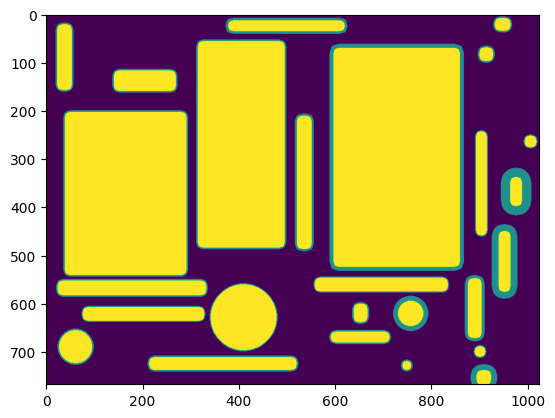

True

In [395]:
image = np.zeros((768,1024), dtype=np.float32)


iters = 30
# new_figure[0] = (0,0)
figs, image = generate_non_overlapping_figures(image, 100)
plt.imshow(image)
plt.show()

cv2.imwrite('./test.png', image.astype(np.uint8))


        